In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
mnist =fetch_openml('mnist_784', as_frame=False)

In [3]:
x, y = mnist['data'], mnist['target']

# Train and Test split

In [4]:
x_train, x_test = x[:10000],x[10000:12000]
y_train, y_test = y[:10000],y[10000:12000]

In [6]:
suffled_index = np.random.permutation(10000)
x_train, y_train = x_train[suffled_index], y_train[suffled_index]

# Non-two detector

In [7]:
y_train = y_train.astype(np.int8)
y_tf_train = (y_train == 2)
y_train = 1*y_tf_train

# MODEL SELECTION

In [8]:
model = SGDClassifier(tol=0.1, max_iter=10000, random_state=42)
# model = LinearRegression()

In [9]:
model.fit(x_train,y_train)

SGDClassifier(max_iter=10000, random_state=42, tol=0.1)

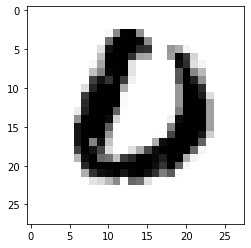

In [10]:
digit = x[3612]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap = matplotlib.cm.binary)

In [11]:
y[3612]

'0'

In [12]:
predd = model.predict([digit])
predd.astype(bool)

array([False])

# RMSE

In [13]:
pred = model.predict(x_train)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)

In [14]:
rmse

0.13674794331177342

# CROSS VALIDATION

In [15]:
scores = cross_val_score(model, x_train, y_train, scoring="accuracy", cv=3)

In [16]:
scores

array([0.96220756, 0.9639964 , 0.96339634])

In [17]:
scores.mean()

0.9632000992540766

# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_train, pred)

array([[8986,   23],
       [ 164,  827]])

# Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [21]:
precision_score(y_train, pred)

0.9729411764705882

In [22]:
recall_score(y_train, pred)

0.834510595358224

In [23]:
f1_score(y_train, pred)

0.8984247691472025

# Threshold

In [24]:
from sklearn.metrics import precision_recall_curve

In [25]:
y_scores = cross_val_predict(model, x_train, y_train, cv=3, method="decision_function")

In [27]:
y_scores

array([-285017.47594708, -313233.45458265, -135219.47051053, ...,
       -153544.01846573,    6065.06621528, -107449.82035966])

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [29]:
precisions

array([0.1077291 , 0.10763209, 0.1076438 , ..., 1.        , 1.        ,
       1.        ])

In [30]:
recalls

array([1.        , 0.99899092, 0.99899092, ..., 0.00201816, 0.00100908,
       0.        ])

In [31]:
thresholds

array([-537816.65503908, -537677.73813723, -537401.21138214, ...,
        484475.69574513,  487690.83374276,  507473.66740155])

# Plotting

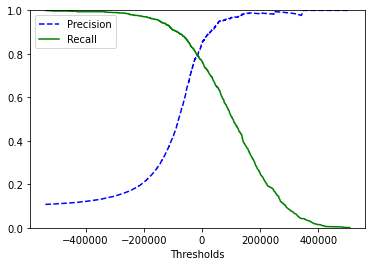

In [38]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()